In [2]:
import numpy as np
import pandas as pd
import random as rand
import matplotlib.pyplot as plt
from gretel_synthetics.timeseries_dgan.dgan import DGAN
from gretel_synthetics.timeseries_dgan.config import DGANConfig, OutputType, Normalization

In [3]:
df1 = pd.read_csv('cooling_system.csv')

In [4]:
df1.drop(['Unnamed: 0', '65213-1639'], axis=1, inplace=True)

In [5]:
df1.shape

(116625, 3)

In [6]:
#df = pd.DataFrame(columns=['','pgn','spn','decodedValue'])
#df = df1.sample(frac=0.1, replace=False)

In [91]:
#df = df1.sample(frac=1, replace=False)
#df.sort_index(inplace=True)
seq_len = 32
model = DGAN(DGANConfig(
    max_sequence_len=seq_len,
    sample_len=1,
    feature_num_layers=2,
    attribute_num_layers=3,
    feature_noise_dim=10,
    batch_size=256,
    epochs=10000,  # For real data sets, 100-1000 epochs is typical
))

model.train_dataframe(
    df1,
    df_style= "long",
    feature_columns=['64817-1598', '65262-110', '65263-111'],
)

2023-11-14 21:07:35,429 : MainThread : WARNING : Example ID column not provided, DGAN will autosplit dataset into sequences of size 32!
2023-11-14 21:07:35,552 : MainThread : INFO : epoch: 0
2023-11-14 21:07:37,304 : MainThread : INFO : epoch: 1
2023-11-14 21:07:37,692 : MainThread : INFO : epoch: 2
2023-11-14 21:07:38,061 : MainThread : INFO : epoch: 3
2023-11-14 21:07:38,473 : MainThread : INFO : epoch: 4
2023-11-14 21:07:38,804 : MainThread : INFO : epoch: 5
2023-11-14 21:07:39,123 : MainThread : INFO : epoch: 6
2023-11-14 21:07:39,456 : MainThread : INFO : epoch: 7
2023-11-14 21:07:39,795 : MainThread : INFO : epoch: 8
2023-11-14 21:07:40,128 : MainThread : INFO : epoch: 9
2023-11-14 21:07:40,450 : MainThread : INFO : epoch: 10
2023-11-14 21:07:40,760 : MainThread : INFO : epoch: 11
2023-11-14 21:07:41,098 : MainThread : INFO : epoch: 12
2023-11-14 21:07:41,419 : MainThread : INFO : epoch: 13
2023-11-14 21:07:41,772 : MainThread : INFO : epoch: 14


KeyboardInterrupt: 

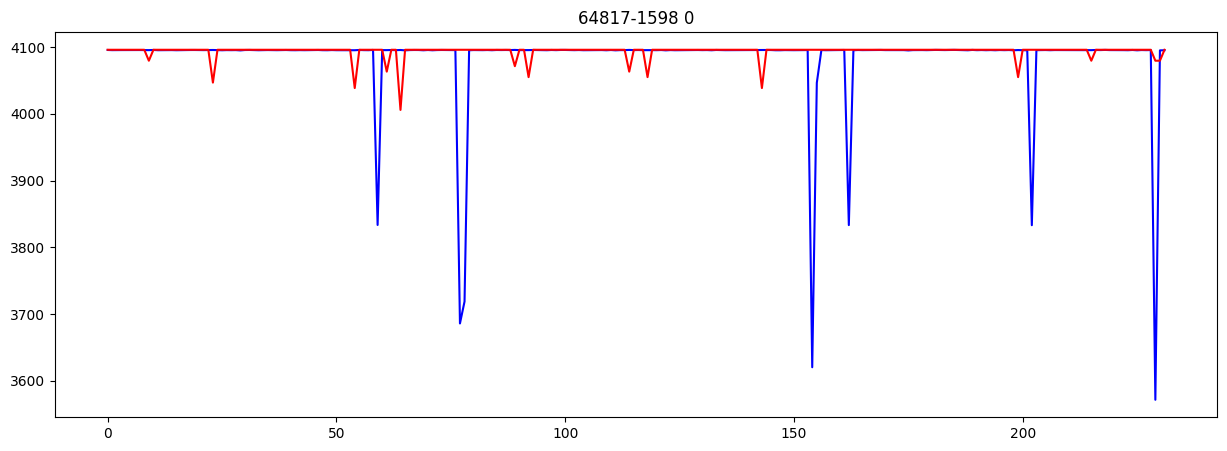

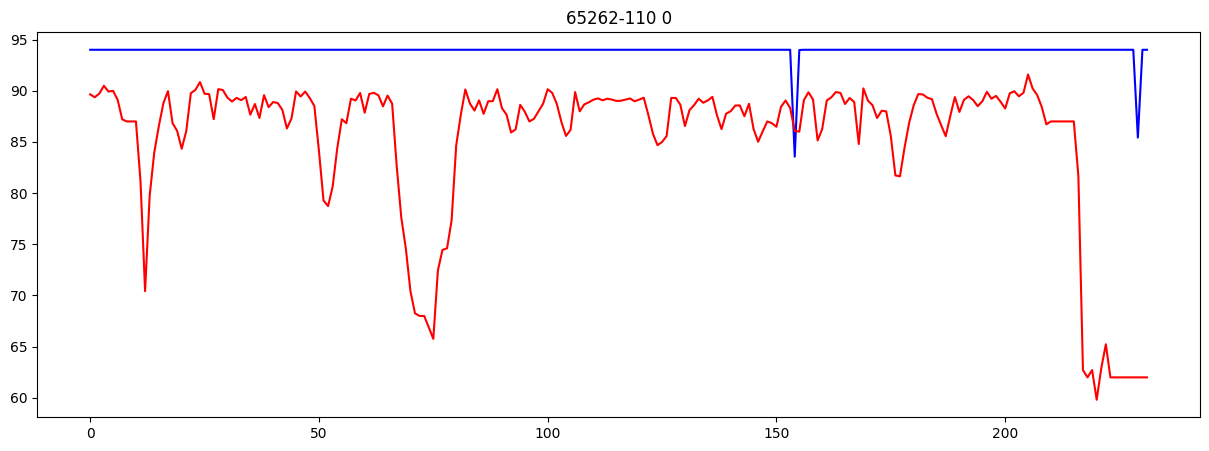

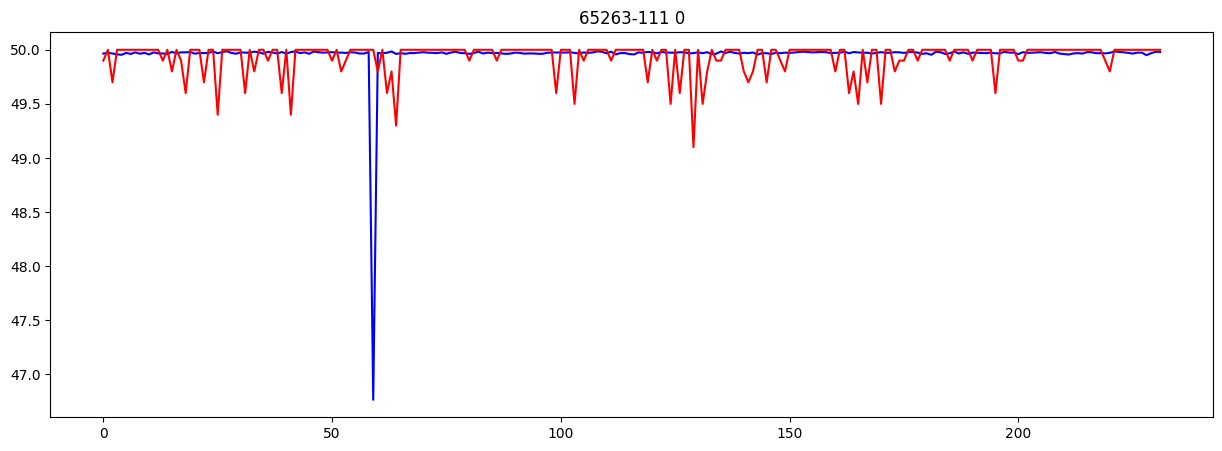

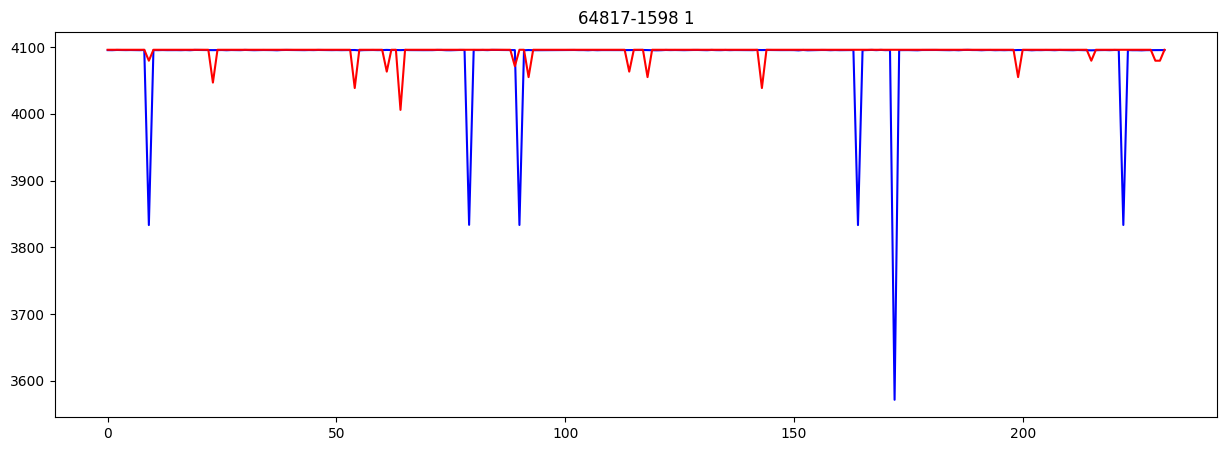

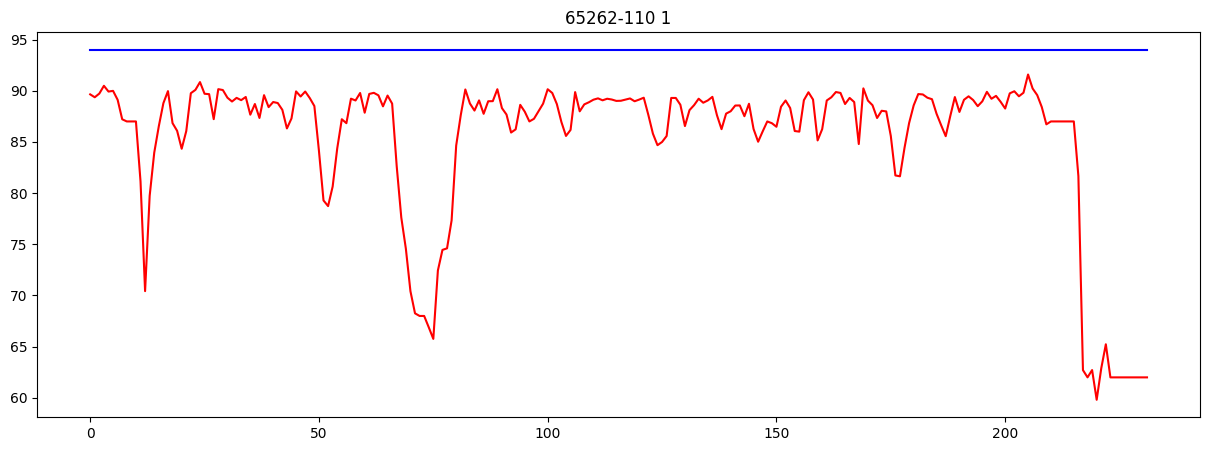

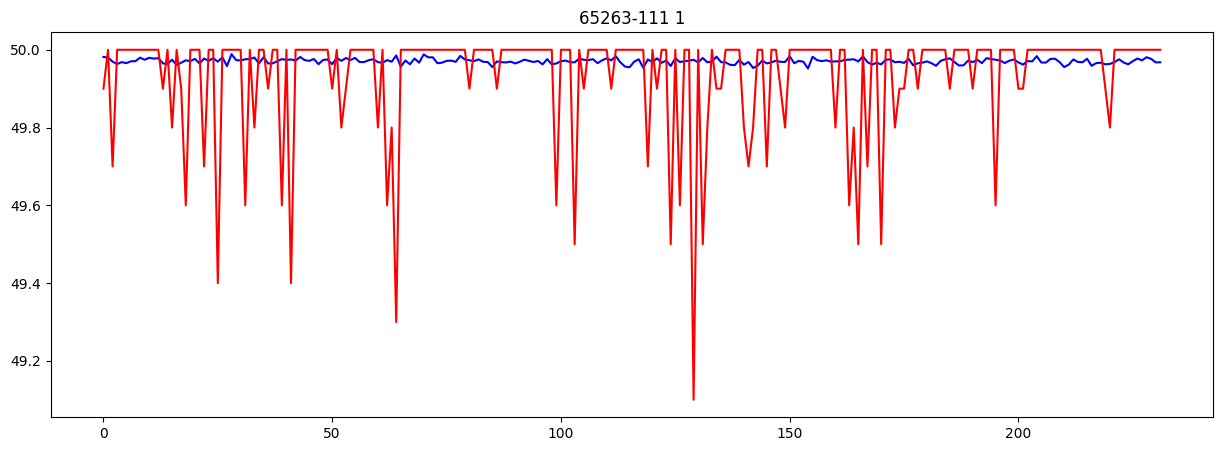

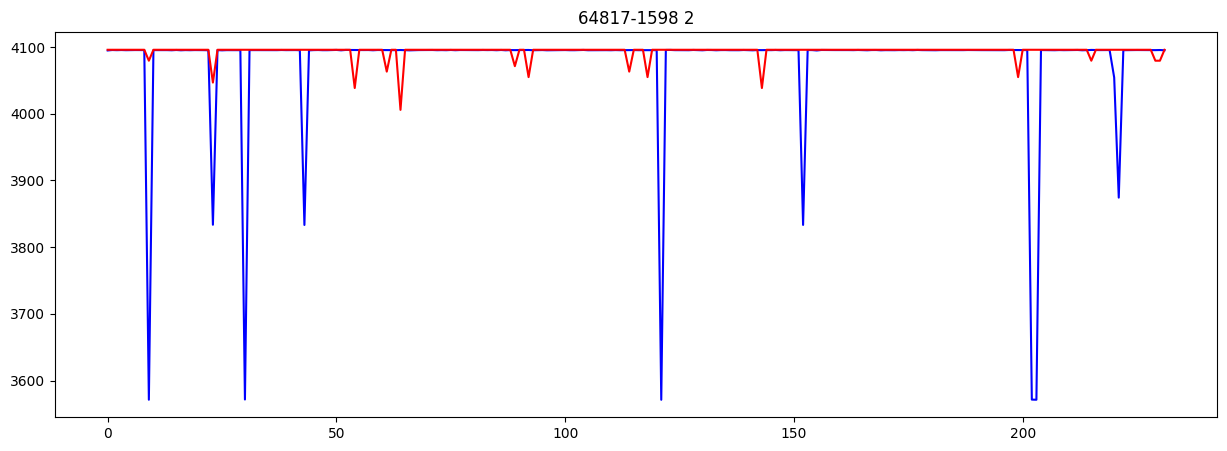

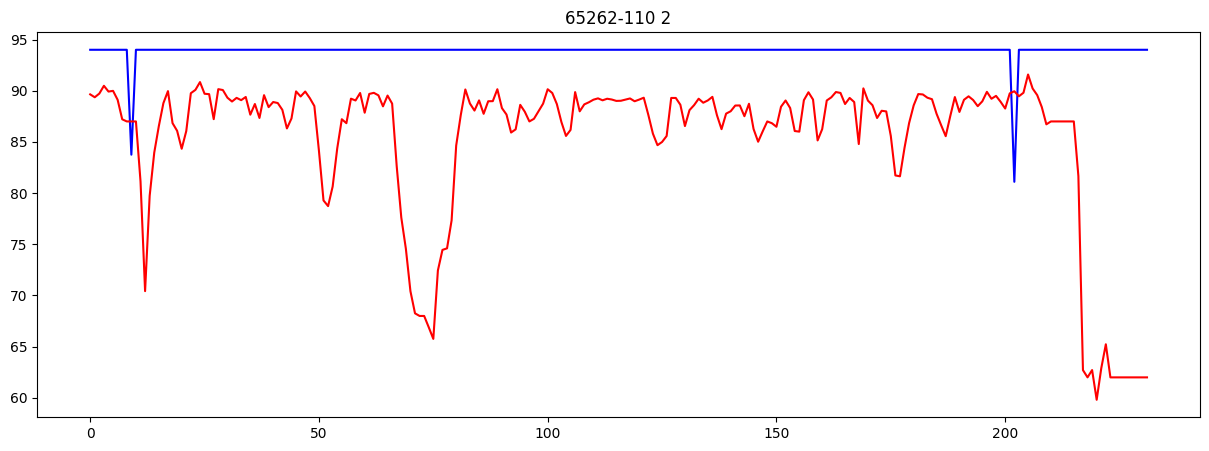

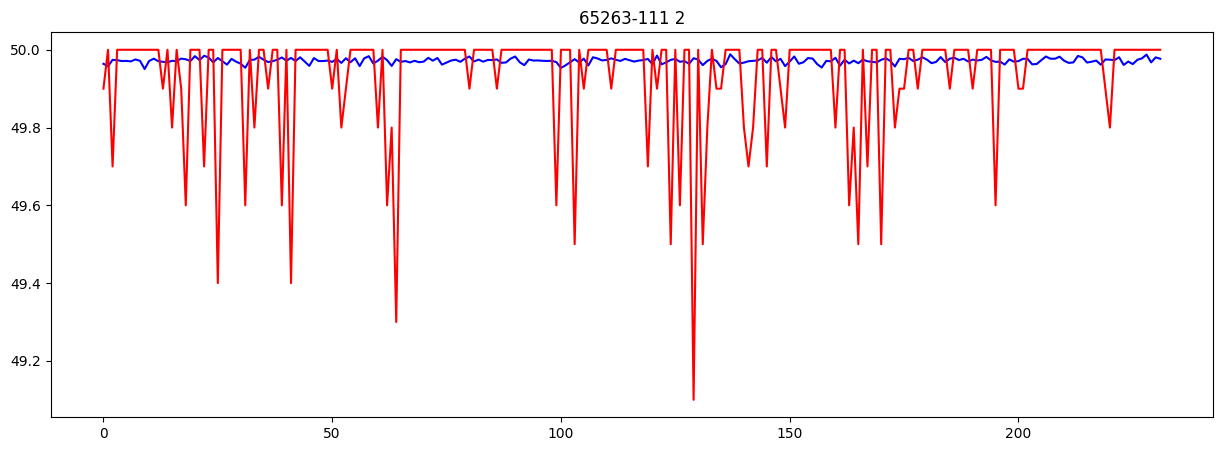

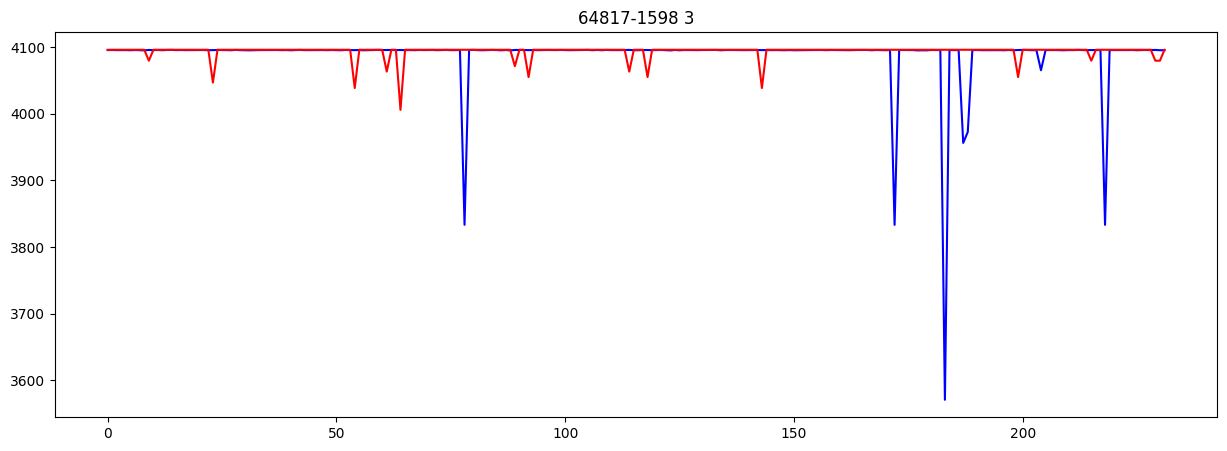

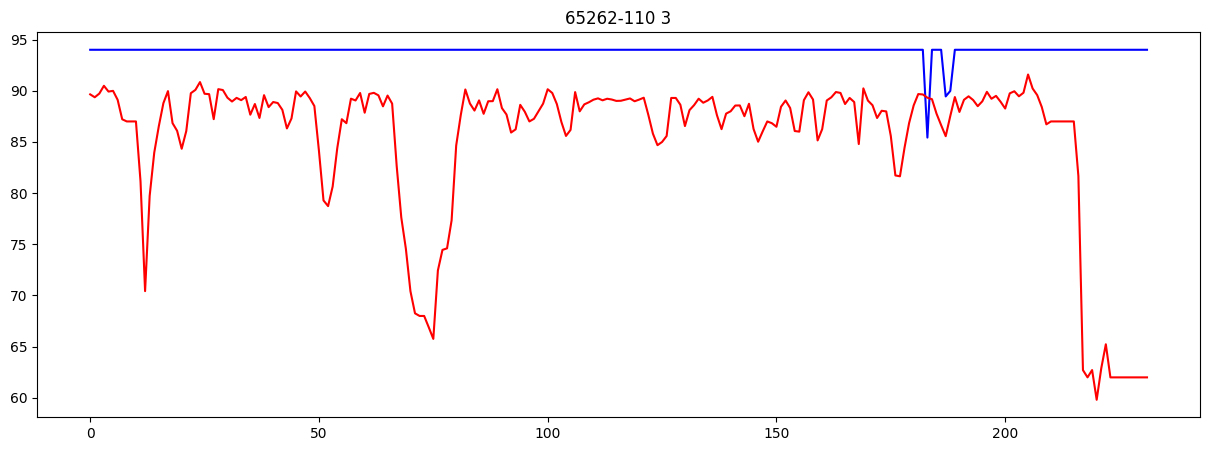

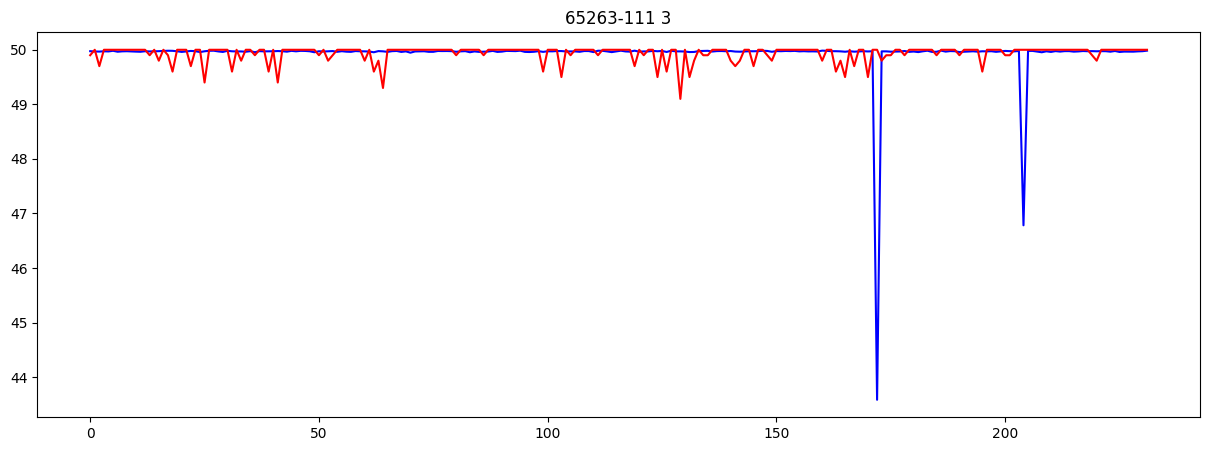

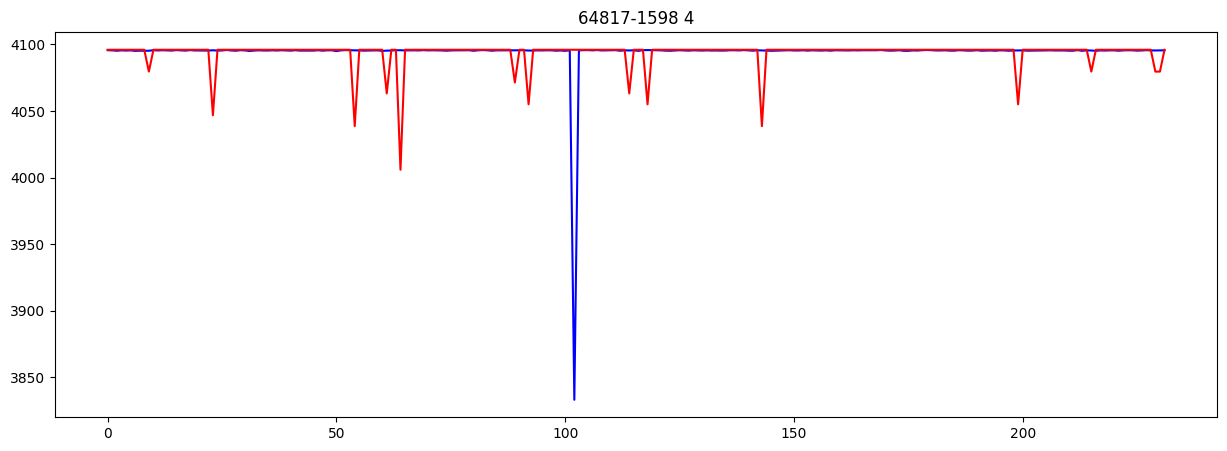

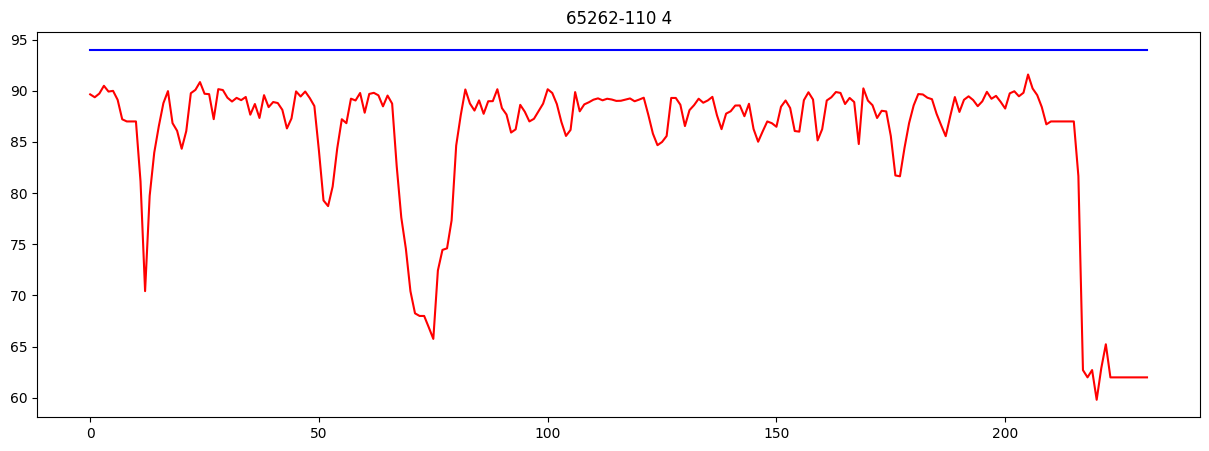

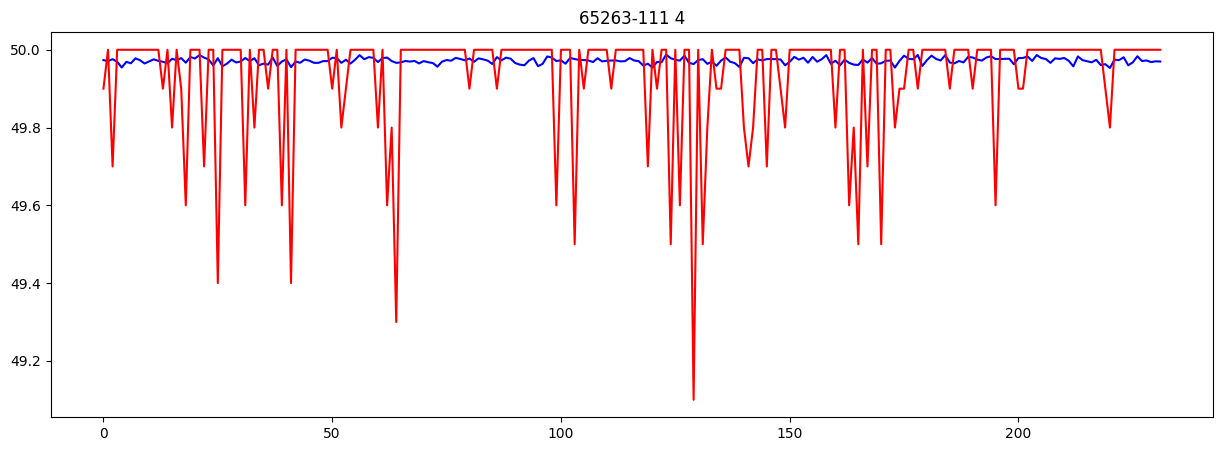

In [ ]:
df = df1.copy()
for i in range(5):
    name = "synthetic_cooling+"+str(i)+".csv"
    

    # Generate synthetic data
    synthetic_df = model.generate_dataframe(int(len(df)/seq_len))

    synthetic_df
    w = 500
    #plt.figure(figsize=(15,5))
    #v1 = synthetic_df['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
    #v2 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
    #plt.title('65213-1639 ' + str(i))
    #plt.plot(np.arange(len(v1)),v1, c='b')
    #plt.plot(np.arange(len(v1)),v2, c='r')
    plt.figure(figsize=(15,5))
    v1 = synthetic_df['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
    v2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
    plt.title('64817-1598 ' + str(i))
    plt.plot(np.arange(len(v1)),v1, c='b')
    plt.plot(np.arange(len(v1)),v2, c='r')
    plt.figure(figsize=(15,5))
    v1 = synthetic_df['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
    v2 = df1['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
    plt.title('65262-110 ' + str(i))
    plt.plot(np.arange(len(v1)),v1, c='b')
    plt.plot(np.arange(len(v1)),v2, c='r')
    plt.figure(figsize=(15,5))
    v1 = synthetic_df['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
    v2 = df1['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
    plt.title('65263-111 ' + str(i))
    plt.plot(np.arange(len(v1)),v1, c='b')
    plt.plot(np.arange(len(v1)),v2, c='r')

    synthetic_df.to_csv(name)
    del synthetic_df
plt.show()

In [ ]:
sdf = pd.read_csv(r'C:\Users\virag\Documents\GitHub\Predictive-Maintenance\synthetic_cooling+2.csv')
sdf.drop(['Unnamed: 0', 'example_id'], axis=1, inplace=True)

In [ ]:
sdf.head()

,65262-110,65263-111,64817-1598
0,94.0,49.98645,4095.7805
1,94.0,49.98645,4095.7805
2,94.0,49.98645,4095.7805
3,94.0,49.98645,4095.7805
4,94.0,49.98645,4095.7805


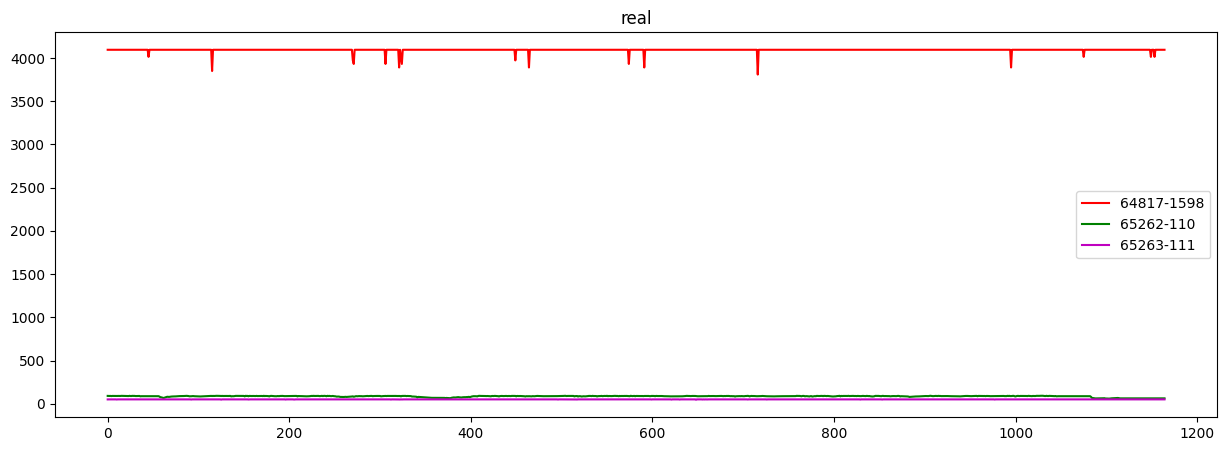

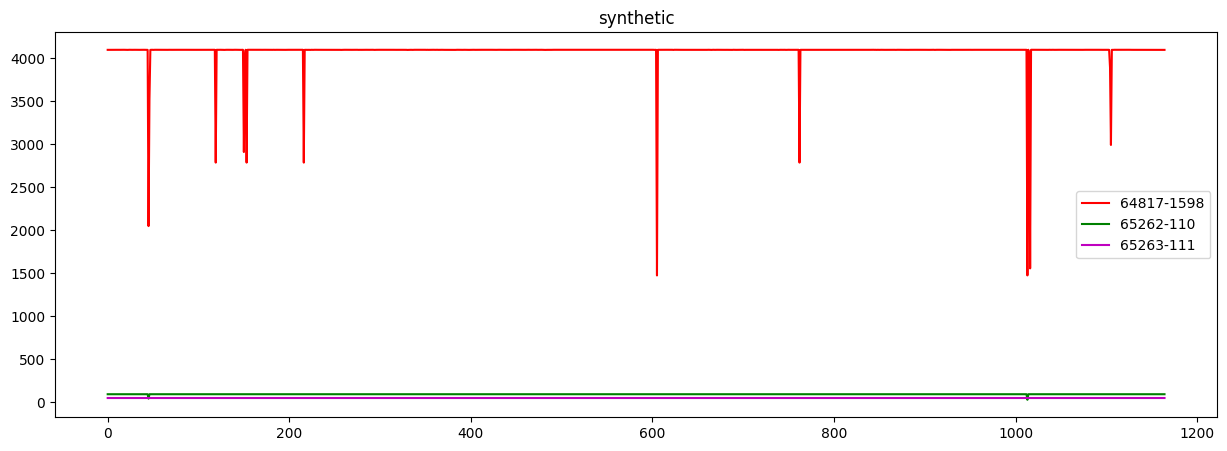

In [ ]:
w=100
plt.figure(figsize=(15,5))
#v1 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v3 = df1['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
v4 = df1['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('real')
#plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v2)),v2, c='r', label='64817-1598')
plt.plot(np.arange(len(v2)),v3, c='g', label='65262-110')
plt.plot(np.arange(len(v2)),v4, c='m', label='65263-111')
plt.legend()
plt.figure(figsize=(15,5))
#v1 = sdf['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v2 = sdf['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v3 = sdf['65262-110'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
v4 = sdf['65263-111'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(sdf)/w))]]/w
plt.title('synthetic')
#plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v2)),v2, c='r', label='64817-1598')
plt.plot(np.arange(len(v2)),v3, c='g', label='65262-110')
plt.plot(np.arange(len(v2)),v4, c='m', label='65263-111')
plt.legend()
plt.show()


In [ ]:
df1.corr()

,65262-110,65263-111,64817-1598
65262-110,1.000000,-0.01008,-0.003337
65263-111,-0.010080,1.00000,-0.000850
64817-1598,-0.003337,-0.00085,1.000000


In [ ]:
sdf.corr()

,65262-110,65263-111,64817-1598
65262-110,1.000000,-0.019619,0.497300
65263-111,-0.019619,1.000000,-0.050544
64817-1598,0.497300,-0.050544,1.000000


In [ ]:
sdf.columns

Index(['65262-110', '65263-111', '64817-1598'], dtype='object')

In [ ]:
def moving_avg(x, N=30):
    return np.convolve(x, np.ones((N,))/N, mode='valid')

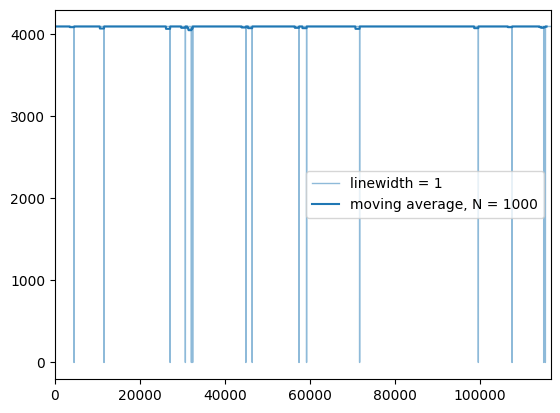

In [ ]:

plt.plot(df1['64817-1598'], linewidth = 1, alpha = 0.5, label = 'linewidth = 1')
plt.plot(moving_avg(df1['64817-1598'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(df1['64817-1598']))
plt.legend()
plt.show()


In [ ]:
'''
plt.plot(synthetic_df['65213-1639'], linewidth = 1, alpha = 0.5, label = 'linewidth = 1')
plt.plot(moving_avg(synthetic_df['65213-1639'], 1000), 'C0', label = 'moving average, N = 1000')
plt.xlim(0,len(synthetic_df['65213-1639']))
plt.legend()

plt.show()
'''

"\nplt.plot(synthetic_df['65213-1639'], linewidth = 1, alpha = 0.5, label = 'linewidth = 1')\nplt.plot(moving_avg(synthetic_df['65213-1639'], 1000), 'C0', label = 'moving average, N = 1000')\nplt.xlim(0,len(synthetic_df['65213-1639']))\nplt.legend()\n\nplt.show()\n"

In [ ]:
'''
w = 100
plt.figure()
v1 = synthetic_df['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
v2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('64817-1598 ' + str(1))
plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v1)),v2, c='r')
plt.figure()
v1 = synthetic_df['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w
v2 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w
plt.title('65213-1639 ' + str(1))
plt.plot(np.arange(len(v1)),v1, c='b')
plt.plot(np.arange(len(v1)),v2, c='r')
plt.show()
'''


"\nw = 100\nplt.figure()\nv1 = synthetic_df['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w\nv2 = df1['64817-1598'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w\nplt.title('64817-1598 ' + str(1))\nplt.plot(np.arange(len(v1)),v1, c='b')\nplt.plot(np.arange(len(v1)),v2, c='r')\nplt.figure()\nv1 = synthetic_df['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(synthetic_df)/w))]]/w\nv2 = df1['65213-1639'].rolling(min_periods=1, window=w).sum()[[i*w for i in range(1, int(len(df1)/w))]]/w\nplt.title('65213-1639 ' + str(1))\nplt.plot(np.arange(len(v1)),v1, c='b')\nplt.plot(np.arange(len(v1)),v2, c='r')\nplt.show()\n"